##  Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
import pickle

## 🔹 Step 2: Load Dataset

In [2]:
# load dataset
df = pd.read_csv('../data/WineQT.csv') 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
# Exploratory Data Analysis (EDA)
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \

##🔹 Step 3: Exploratory Data Analysis (EDA)

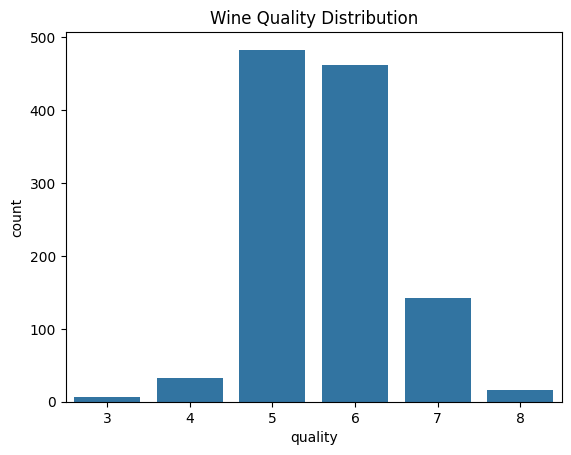

In [4]:
# Visualize quality distribution
sns.countplot(x='quality', data=df)
plt.title('Wine Quality Distribution')
plt.show()

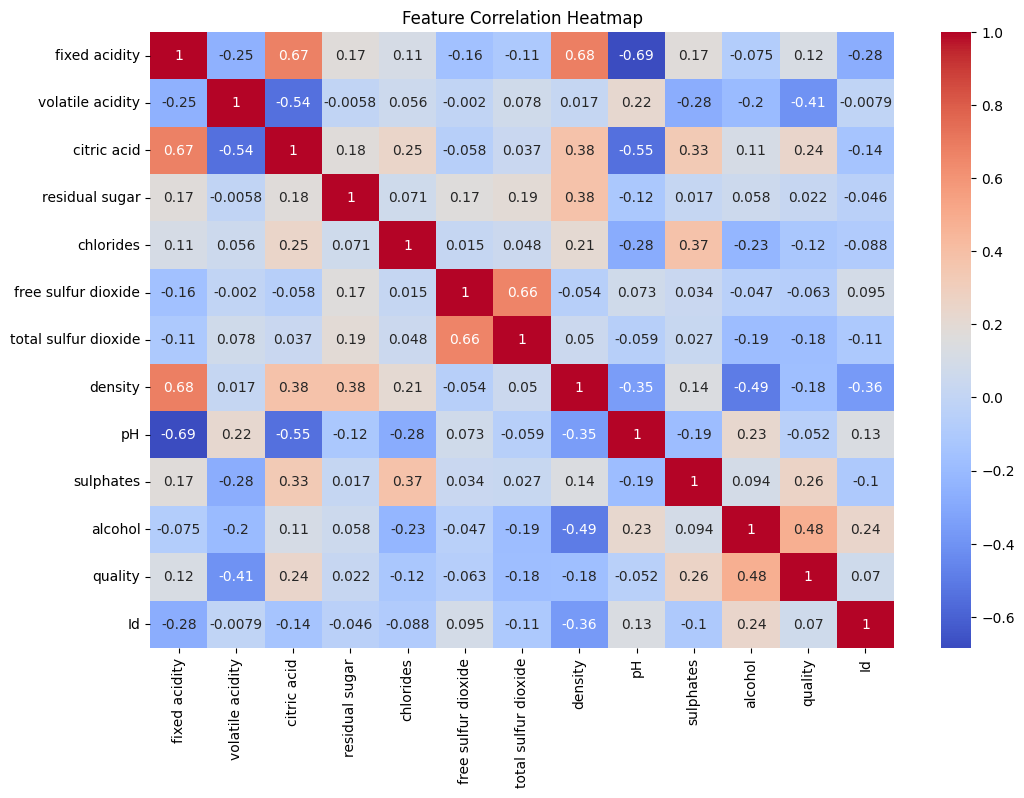

In [5]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## 🔹 Step 4: Preprocessing

### A. Create Quality Labels (Classification)

In [6]:
# Map quality to categories: low, medium, high
def quality_label(value):
    if value <= 5:
        return 'low'
    elif value == 6:
        return 'medium'
    else:
        return 'high'

df['quality_label'] = df['quality'].apply(quality_label)
df['quality_label'] = df['quality_label'].astype('category')

### B. Encode Labels and Split

In [7]:
# Drop columns that are not actual features
X = df.drop(["quality", "quality_label", "Id"], axis=1)  # Keep only 11 numeric features
y = df["quality"]  # Target variable

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 🔹 Step 5: Train Models

### A. Random Forest

In [8]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6986899563318777
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.71      0.80      0.75        96
           6       0.68      0.66      0.67        99
           7       0.72      0.69      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.42      0.43      0.43       229
weighted avg       0.67      0.70      0.68       229



e:\wine quality model\wine-env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\wine quality model\wine-env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\wine quality model\wine-env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


### B. Logistic Regression

In [9]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

lr_pred = lr.predict(X_test_scaled)
lr_acc = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred, average='weighted')

print("Logistic Regression Accuracy:", lr_acc)
print("F1 Score:", lr_f1)
print(classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.62882096069869
F1 Score: 0.6169033158187924
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.73      0.70        96
           6       0.62      0.64      0.63        99
           7       0.48      0.42      0.45        26
           8       0.00      0.00      0.00         2

    accuracy                           0.63       229
   macro avg       0.36      0.36      0.36       229
weighted avg       0.61      0.63      0.62       229



e:\wine quality model\wine-env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\wine quality model\wine-env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\wine quality model\wine-env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


## 🔹 Step 6: Compare Models

In [11]:
model_scores = {
    'Model': ['Random Forest', 'Logistic Regression'],
    'Accuracy': [model, lr_acc],
    'F1 Score': [model, lr_f1]
}

score_df = pd.DataFrame(model_scores)
print(score_df)

                 Model                                           Accuracy  \
0        Random Forest  (DecisionTreeClassifier(max_features='sqrt', r...   
1  Logistic Regression                                           0.628821   

                                            F1 Score  
0  (DecisionTreeClassifier(max_features='sqrt', r...  
1                                           0.616903  


## 🔹 Step 7: Save Best Model

In [12]:
# Save model and scaler to same directory as app.py
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

In [13]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)